In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: [Mar 17, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "baguette food",
    "banana bread food",
    "bread food",
    "data science",
    "sports analytics",
    "football sport",
    "ice hockey",
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,baguette food,It is distinguishable by its length and crisp crust.,10
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",20
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17
6,ice hockey,It belongs to a family of sports called hockey.,10


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

3 Clusters:
1. Food
   - baguette food
   - banana bread food
   - bread bood
3. Data Science
   - data science
   - sports analytics
5. Sports
   - football sport
   - ice hockey

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
# referenced from lecture 6
vec = CountVectorizer()
X_counts = vec.fit_transform(wiki_df["text"])
bow_df = pd.DataFrame(
    X_counts.toarray(), columns=vec.get_feature_names_out(), index=wiki_df["text"]
)
bow_df

,2011,ability,also,an,analytics,and,application,are,around,been,...,technology,term,the,throughout,to,underlying,use,was,world,yeast
text,,,,,,,,,,,,,,,,,,,,,
It is distinguishable by its length and crisp crust.,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
It is often a moist and sweet quick bread but some recipes are yeast raised.,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",0,0,0,1,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",0,0,1,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",1,0,0,0,1,0,0,0,0,0,...,0,1,3,0,0,0,0,1,0,0
"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
It belongs to a family of sports called hockey.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_bow_labels = kmeans.fit_predict(X_counts)
kmeans_bow_labels

array([1, 2, 0, 1, 1, 1, 1], dtype=int32)

In [7]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,baguette food,It is distinguishable by its length and crisp crust.,10,1
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",20,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,1
6,ice hockey,It belongs to a family of sports called hockey.,10,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

In [9]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.186268,0.286701,0.058714,0.095216,-0.136911,0.091687,-0.029694,-0.104941,0.174888,0.482773,...,0.025579,-0.078821,0.470531,-0.209694,-0.379227,0.409230,-0.299176,0.155533,0.309284,0.124819
1,-0.202058,0.320748,0.190347,0.232200,0.600541,0.376622,-0.018205,-0.027148,-0.076680,0.381883,...,0.213061,-0.080009,0.422756,0.072725,0.016024,-0.014596,-0.202858,-0.162947,-0.190418,-0.002013
2,-0.056684,0.222303,0.048026,0.053723,0.304123,0.396496,-0.000865,-0.261328,0.180089,0.177299,...,0.343995,-0.412435,-0.010878,0.022342,0.371977,0.108193,0.385293,0.147794,-0.077855,0.222680
3,0.270839,0.187923,-0.010779,0.318688,-0.092012,-0.204805,0.038100,-0.117648,0.084057,-0.170613,...,0.069943,-0.222988,0.092472,0.309445,0.289248,0.021022,-0.032693,-0.624040,0.358924,-0.034092
4,-0.101732,-0.185133,-0.107289,0.148192,0.458463,-0.555427,-0.073999,0.001754,-0.172459,-0.072560,...,0.428589,-0.340837,-0.159757,0.388600,0.316263,0.090864,-0.162353,-0.225393,0.417017,-0.179008
5,0.124750,0.327760,0.287334,-0.108246,0.024023,-0.123068,0.256753,-0.186897,0.207024,0.225442,...,0.476354,-0.425227,0.153235,0.176922,0.036421,0.104009,-0.137497,0.265884,0.431444,0.173653
6,0.108901,0.087363,0.119847,-0.050133,0.240210,-0.082101,0.190988,0.436203,-0.085557,-0.012788,...,0.145414,0.160033,0.071930,0.147640,0.043789,0.253031,-0.009358,0.415206,0.142142,0.130365


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [11]:
kmeans_emb_labels = kmeans.fit_predict(emb_sents)

In [12]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",20,0,0
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,1,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,1,1
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.75, min_samples=2, metric='cosine')

In [15]:
dbscan_emb_labels = dbscan.fit_predict(emb_sents)

In [16]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2,0
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2,0
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",20,0,0,-1
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,1,1,1
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,1
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,1,1,1
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

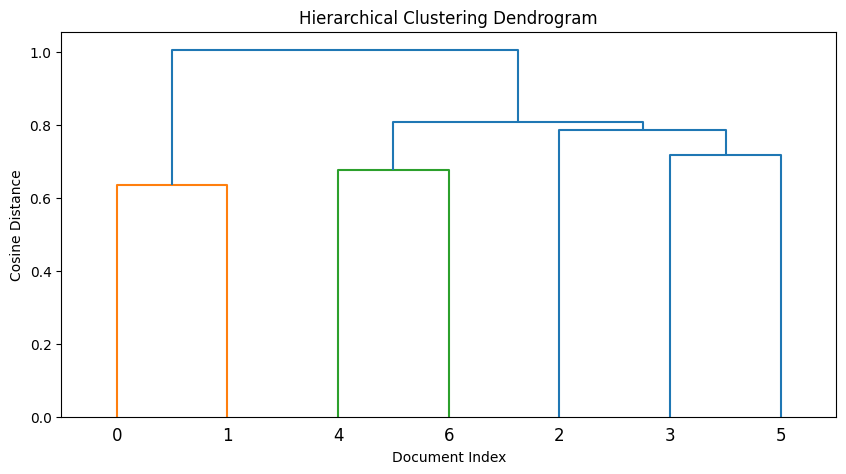

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(emb_sents, method='complete', metric='cosine')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=wiki_df.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Document Index")
plt.ylabel("Cosine Distance")
plt.show()


In [18]:
n_clusters = 3
hier_emb_labels = fcluster(Z, n_clusters, criterion='maxclust')

In [19]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,baguette food,It is distinguishable by its length and crisp crust.,10,1,2,0,1
1,banana bread food,It is often a moist and sweet quick bread but some recipes are yeast raised.,16,2,2,0,1
2,bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diets.",20,0,0,-1,3
3,data science,"Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).",24,1,1,1,3
4,sports analytics,"The term ""sports analytics"" was popularized in mainstream sports culture following the release of the 2011 film Moneyball.",21,1,1,1,2
5,football sport,"Often competitive and organized, sports use, maintain, or improve physical ability and skills.",17,1,1,1,3
6,ice hockey,It belongs to a family of sports called hockey.,10,1,1,1,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

### Bag of Words with KMeans:
The problem with BoW is that it ignores word order and meaning. This means that clusters are based on word frequency similarity rather than also considering semantic meaning. If the same word is used in different contexts, BoW approach would be less effective. 

This is shown in the results, where all the food items got put into different groups. It also put data science and sport examples into the same cluster, meaning that this model wouldn't be very helpful with clustering in this situation.

### Sentence Embeddings with KMeans
Sentence embeddings capture semantic similarity better, meaning context is taken into consideration when analyzing a word. 

This means that the clusters formed would also be more meaningful compared to the bag of words approach. This can be seen in the clustering results, where more of the food examples were grouped together compared to the BoW variant. However, I would have liked to see the data science and sport examples to be distinguished better instead of getting clustered into the same group.

### Sentence Embeddings with DBScan
For DBScan and Hierarchical Clustering, we are able to set cosine similarity as the metric used for distance calculations. I was hoping because of this, that the results would be better. However, the results were almost identical to KMeans, with bread food excluded from the cluster rather than being part of a different cluster from the other food items. I spent a while finetuning eps and min_samples, and this was the best result out of my testing. Before hyperparameter tuning, the results were even worse, where the model failed to do any clustering and most of the points were -1.

### Sentence Embeddings with Hierarchical Clustering
This is similar to DBScan with the fact that we are able to set cosine similarity as the metric used for distance calculations. In addition, it was easier to create the model compared to DBScan, as I just specified the max number of clusters to be the number of clusters I wanted (3). However, the end results were a little disappointing and I expected more. Although it grouped 2 out of  the 3 food items correctly, the other results were not the best. In particular, none of the items in cluster 3 are similar to each other, such as bread food, data science, and football sport.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [20]:
import umap

In [21]:
# Removes umap warnings due to a change of API in sklearn.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42, n_jobs=1)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

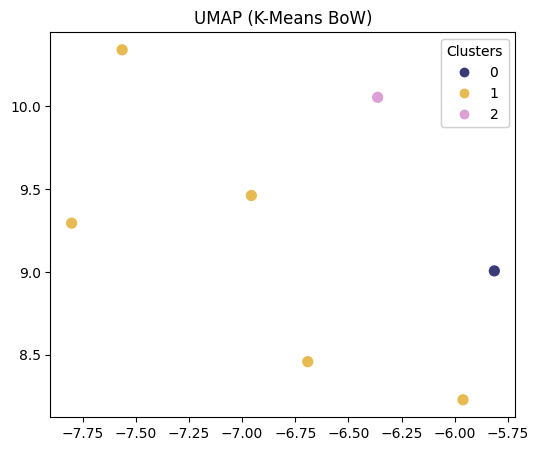

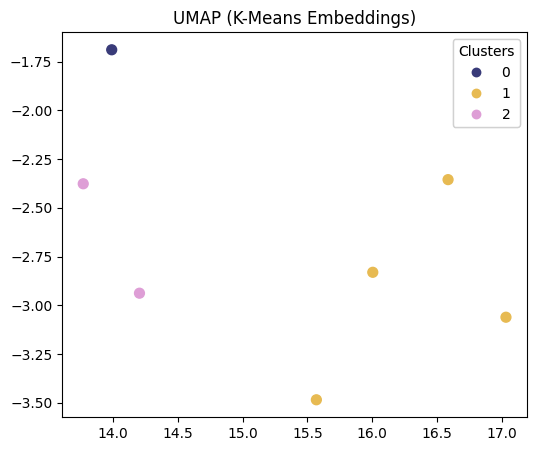

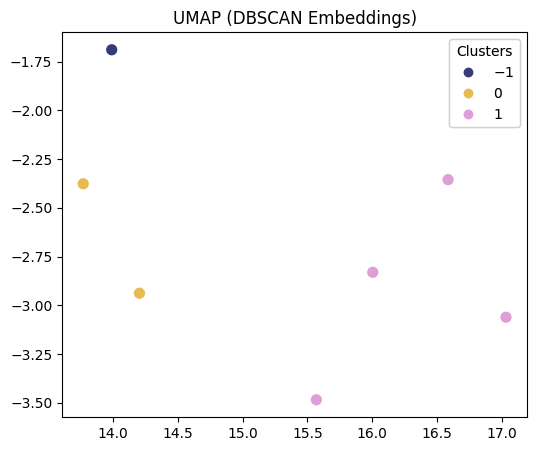

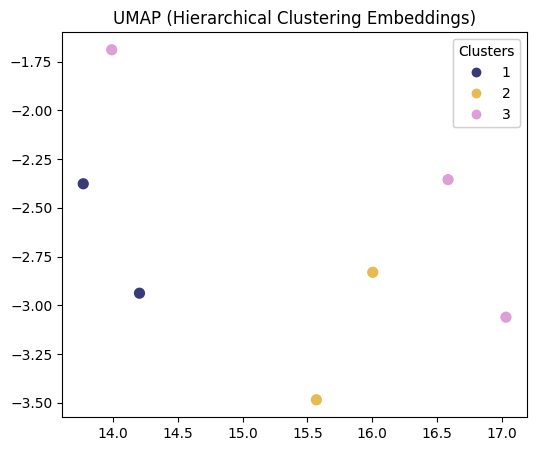

In [22]:
plot_umap_clusters(
    data=X_counts.toarray(),
    cluster_labels=wiki_df["bow_kmeans"],
    title="UMAP (K-Means BoW)",
    n_neighbors=3
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=wiki_df["emb_kmeans"], 
    title="UMAP (K-Means Embeddings)",
    n_neighbors=3
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=wiki_df["emb_dbscan"],
    title="UMAP (DBSCAN Embeddings)",
    n_neighbors=3
)

plot_umap_clusters(
    data=emb_sents,
    cluster_labels=wiki_df["emb_hierarchical"],
    title="UMAP (Hierarchical Clustering Embeddings)",
    n_neighbors=3
)

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [23]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [24]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [25]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [26]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [27]:
name_lengths = recipes_df["name"].str.len()

shortest_idx = name_lengths.idxmin()
shortest_recipe = recipes_df.loc[shortest_idx, "name"]

longest_idx = name_lengths.idxmax()
longest_recipe = recipes_df.loc[longest_idx, "name"]

print("shortest recipe name: " + shortest_recipe)
print("longest recipe name: " + longest_recipe)

shortest recipe name: bread
longest recipe name: baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

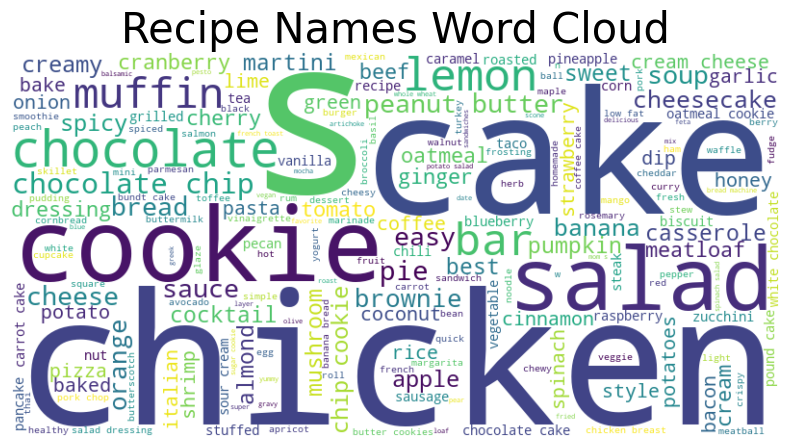

In [28]:
from wordcloud import WordCloud

# combine all recipe names to one big string
# needed to use word cloud for recipe names
all_names_text = " ".join(recipes_df["name"].tolist())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
)

wc.generate(all_names_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Recipe Names Word Cloud", fontsize=30)
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [29]:
embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

emb_sents = embedder.encode(recipes_df["name"].tolist())

embeddings = pd.DataFrame(emb_sents, index=recipes_df.index)

embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333474,0.227865,-0.307339,0.410549,0.917103,-0.345506,0.305810,0.256676,-0.147712,0.040727,...,-0.053025,-0.209463,0.362418,-0.246085,0.208379,-0.024874,0.506561,0.197738,-0.386421,-0.002184
101,-0.024523,0.246223,-0.055708,0.358273,0.454786,-0.088054,0.260368,0.231947,0.093013,-0.007835,...,0.144860,-0.435459,0.208344,-0.002655,-0.081200,-0.130489,0.452378,0.186310,-0.278500,0.028580
129,-0.026562,0.194671,0.038102,-0.099181,0.653784,-0.230868,0.064517,0.001376,-0.061280,0.232094,...,0.169605,0.239354,0.392649,0.271398,-0.093971,0.060101,-0.281418,0.133210,-0.122344,-0.109863
138,-0.168002,-0.219218,0.330761,0.302196,-0.173169,0.204557,0.192390,0.140975,0.303174,0.038063,...,0.019094,-0.002448,0.437833,0.563785,0.033442,0.187658,0.529252,-0.233786,0.509931,0.410715
163,0.061076,-0.333798,0.242905,0.395977,-0.466468,0.496505,-0.136754,0.122097,0.114248,0.065317,...,0.044438,-0.213657,0.410353,-0.233599,-0.224422,0.094330,0.173351,0.105781,-0.114749,-0.150677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.009714,0.200162,0.018329,0.237816,0.748988,0.121919,0.087918,0.216755,-0.291041,0.074165,...,-0.120459,0.162877,0.480064,0.235902,0.146278,0.252980,-0.063639,-0.066044,-0.133067,-0.034040
231514,-0.106532,-0.034574,0.160070,0.258504,0.882480,0.091899,0.008815,0.372013,-0.266542,0.085018,...,0.063240,-0.099132,0.332694,0.031869,0.582796,0.216874,0.241107,0.091758,-0.261551,-0.082310
231547,0.016149,-0.053035,-0.035097,-0.021835,0.735161,0.245519,-0.151837,0.003954,0.102566,0.001363,...,0.102296,0.023821,0.602685,-0.067070,0.177535,0.253982,0.242439,-0.436000,-0.053910,0.012423
231596,0.026659,0.202483,0.344633,-0.138708,0.514424,0.630948,-0.003165,-0.102897,-0.434900,-0.192056,...,-0.162457,0.130696,0.113645,0.186650,-0.155393,0.130507,1.146238,-0.240861,0.236830,0.177123


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [30]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

## Conclusion: 

kmeans with 7 clusters is the best performing model based on the results of the tests below.

In [61]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

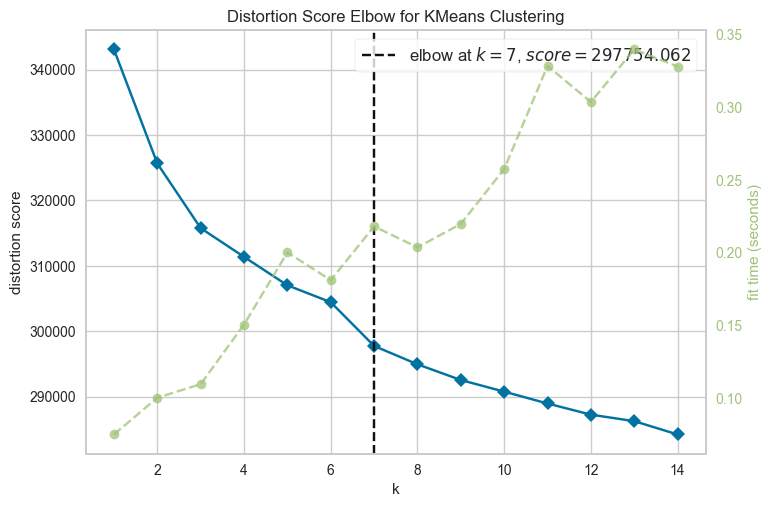

In [289]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 15))

visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.finalize();

### Elbow Plot
To find the optimal number of clusters to use for kmeans, we can start with an elbow plot. Here, the blue line represents the distortion score, which measures the level of inertia from our model. The distortion score decreases with k. The green dotted line represents the fit time, which increases with k. This gives us a trade off between minimizing inertia, while also ensuring the model doesn't take too long to fit (reduce complexity). Here, the elbow visualizer marks k = 7 as the elbow point, where the tradeoff between increasing clusters to decrease the distortion score is not worth making the model more complex and take longer to run.

Now, we can explore some silhouette plots at different cluster levels to assess how well-separated our clusters are.

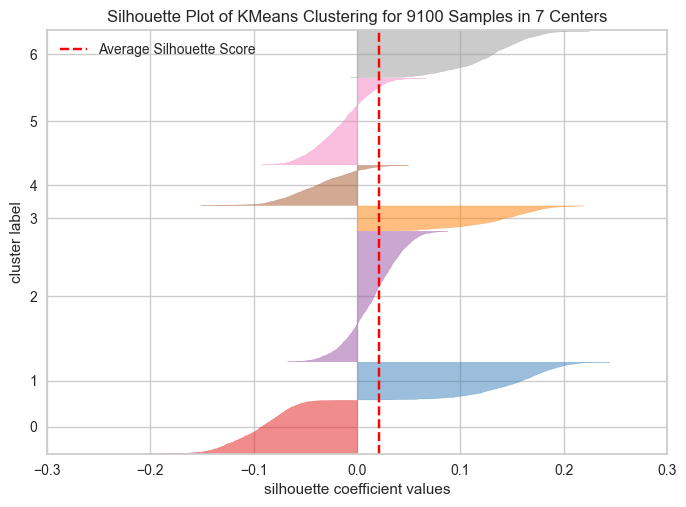

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9100 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [292]:
best_k = visualizer.elbow_value_

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(emb_sents)

silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(emb_sents)
silhouette_visualizer.show()

The Silhouette Plot for K-Means Clustering with 7 clusters shows the distribution of silhouette coefficients for each cluster. The red dashed line represents the average silhouette score appears to be close to zero, this indicates that the clustering structure is weak. Some clusters have negative silhouette values, meaning that certain data points might be misclassified or are overlapping with other clusters. The uneven widths of the clusters suggest imbalanced cluster sizes, meaning some clusters being more compact than others. Overall, this result suggests that while k = 7 was chosen based on the Elbow method, the clusters may not be well-separated, and further tuning (e.g., different k values or a different clustering algorithm) might be necessary for better-defined clusters.

Let's look at the Silhouette plot for k values other than 7:

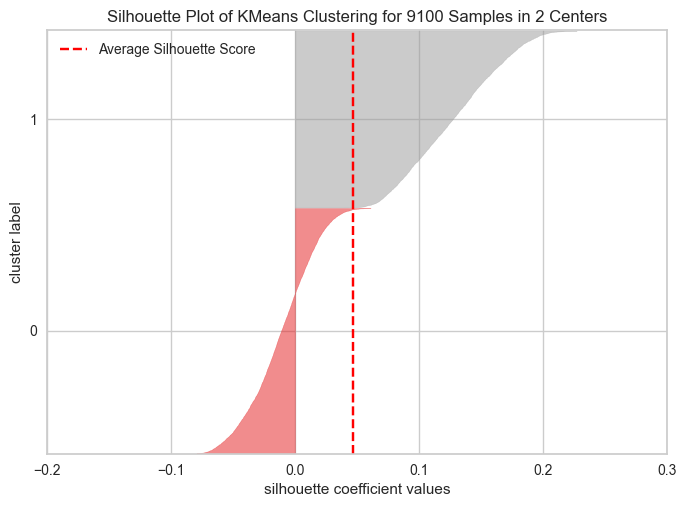

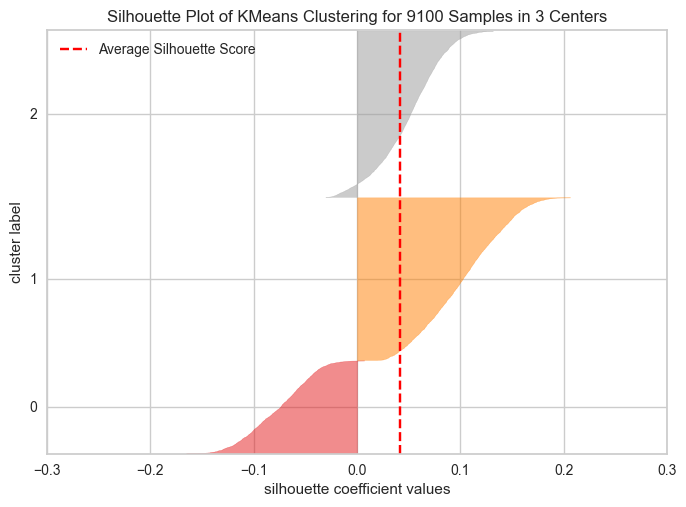

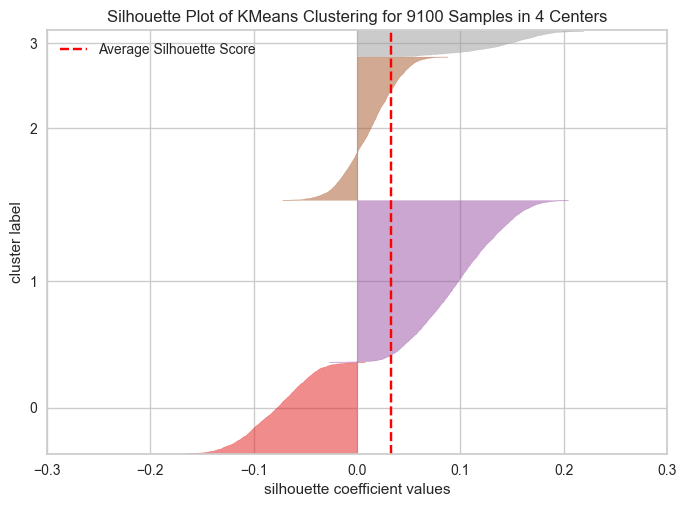

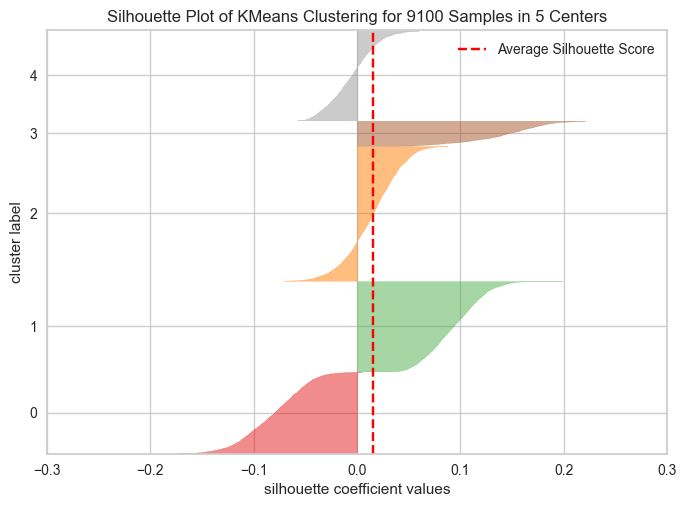

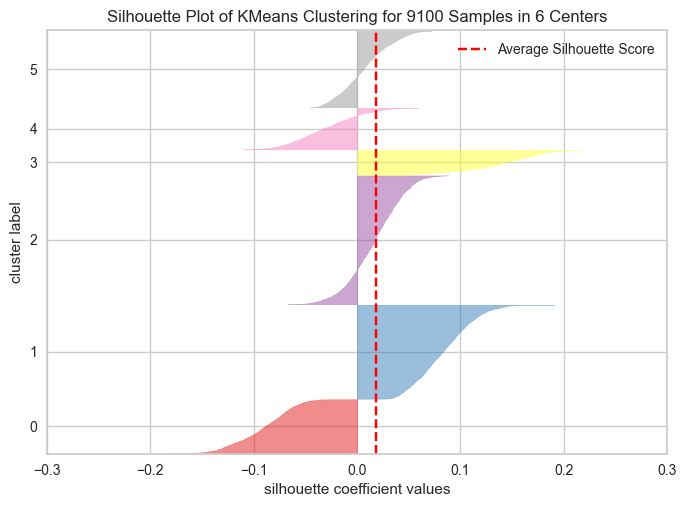

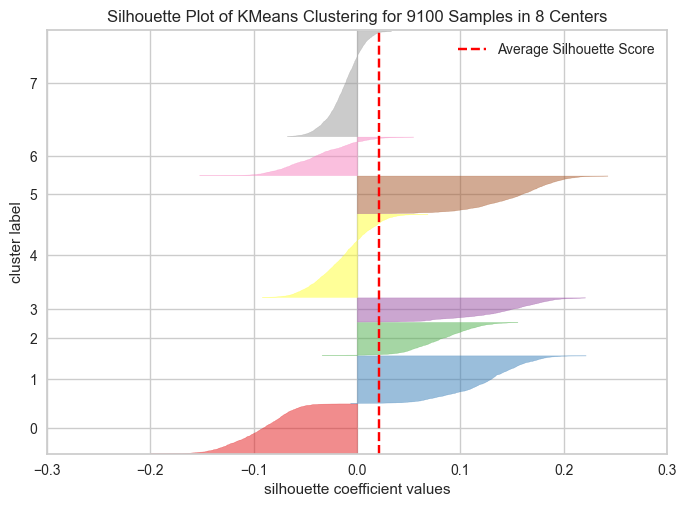

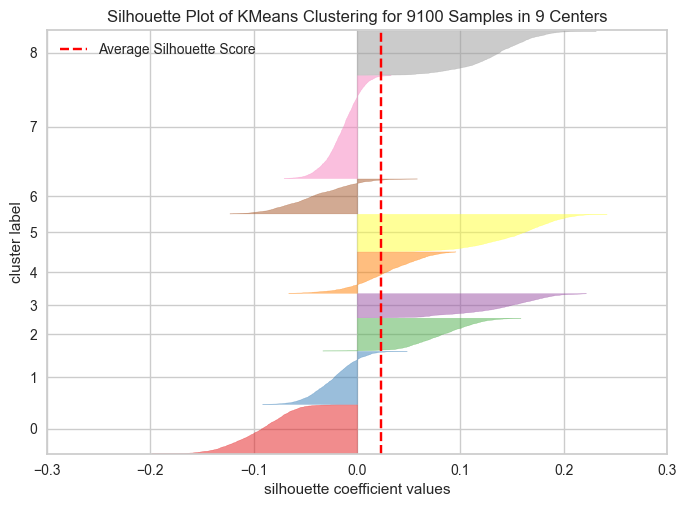

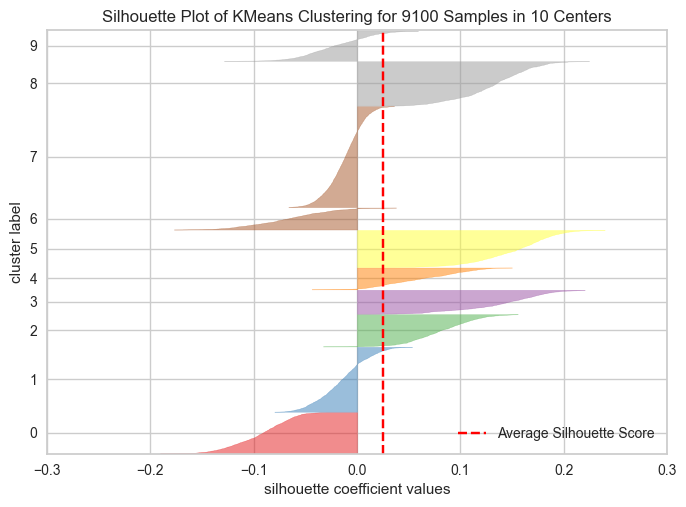

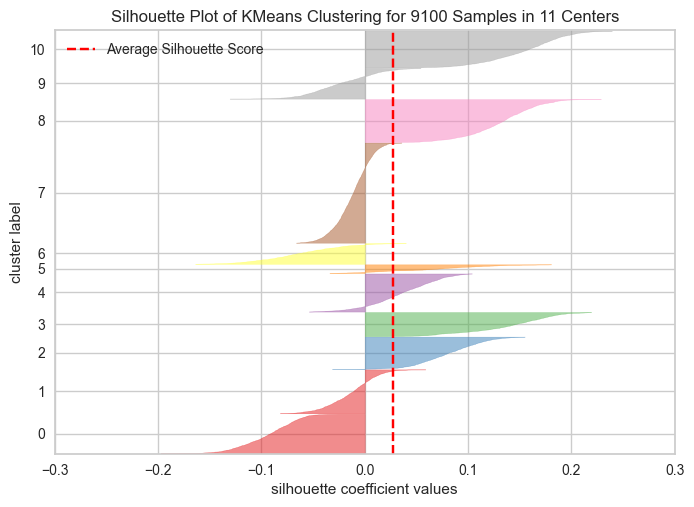

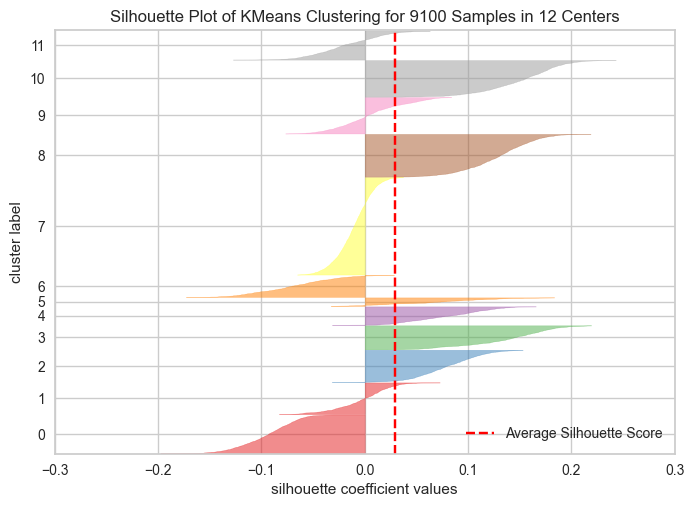

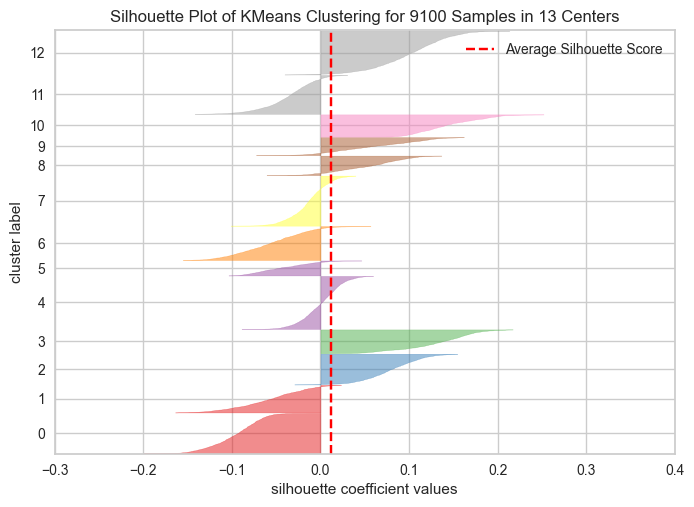

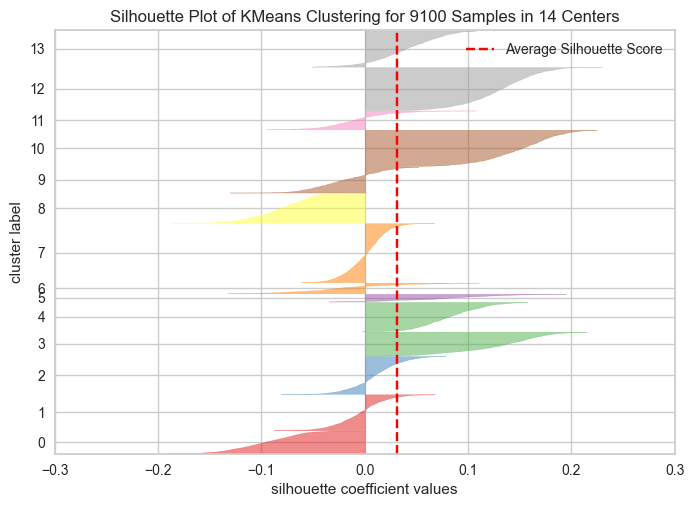

In [294]:
best_k = visualizer.elbow_value_
k = [2,3,4,5,6,8,9,10,11,12,13,14]

for i, kval in enumerate(k):
    kmeans = KMeans(n_clusters=kval, random_state=42)
    kmeans_labels = kmeans.fit_predict(emb_sents)

    # Visualize silhouette scores
    silhouette_visualizer = SilhouetteVisualizer(kmeans)
    silhouette_visualizer.fit(emb_sents)
    silhouette_visualizer.show()

### Results of Silhouette Plots
After extensive visual evaluation of the silhouette plots, I have discovered that as the k value increases, the cluster sizes become more and more even. However, the avg silhouette score does not provide any significant improvement over k = 7 and there are still negative coefficient values. It might be true that KMeans is not the best model for this dataset. Now, let's just progress by predicting with k=7

Let us now predict with the best value of `k = 7` using KMeans clustering. We will use the given print_clusters method to analyze ther esults in more detial

### Results of Print_clusters
The results for k=7 aren't bad, as it was able to provide some distinct clusterings. Although there are still some weak clusters, such as cluster 0, some of the clusters had very strong themes. For example, cluster 1 contains only cookie related recipes, with no outliers based on our sample. Some other clusters also contained only items that clearly belong together, such as salad recipes in cluster 3 or cake recipes in cluster 6.

In [163]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_emb_labels = kmeans.fit_predict(emb_sents)

recipes_df["emb_kmeans_7"] = kmeans_emb_labels
print_clusters(recipes_df = recipes_df, cluster_labels = recipes_df["emb_kmeans_7"], random_state=42)

Cluster 0
----------
tzatziki  barefoot contessa  ina garten
anything dip
ginger honey
the hummer
cowgirl hot pot
shandy
biscuits
margarita madras
italian style flounder
voodoo



Cluster 1
----------
oats and peanut butter giant cookies  lighter
easy gingerbread cookies
peanut  butter cookies
secret ingredient chocolate chip cookies
eggnog  sparkle  cookies
grandma wolcotts chocolate jumbles  1912
gg s lace cookies
sarah s  m   m cookies
mom s southern cream cookies
bon bon   hershey s  kisses  cookies



Cluster 2
----------
shrimp pomodoro pasta
not your average moist and tender pork chops recipe
v s pepper blue pizza
pepperoni pie
sarasota s spicy garlic and bacon lima beans
pecan encrusted scallops with black bean salsa
romesco with grilled bread  spring onions and shrimp
coconut chicken in crock pot
split pea soup with turkey sausage
bacon  cabbage  and white bean soup



Cluster 3
----------
spicy black bean spinach salad
ranch house salad with pecan vinaigrette
favorite salad d

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

### Results from SilhouetteVisualizer
Because there are 2 hyperparameterse to tune for DBScan, we can run multiple models under a for loop to find one with the best silhouette score.

We found that the hyperparameters with the best silhouette score are eps=0.5 and min_samples=6.

I plotted the hyperparameter mentioned above, as well as some other ones to see the difference. It appears that eps=0.7 and min_samples=100 gives an even higher silhouette score, but it won't be useful because it only has 1 real cluster. This means that it would group every recipe in the same cluster, which would give the same result as not clustering at all. Therefore, we will stick with eps=0.5 and min_samples=6 as our final model.

I predicted the labels using DBScan at the bottom of 3.2, and I also analyzed the results there.

In [297]:
# Let's just test out some values and check which give the best average silhouette scores
from sklearn.metrics import silhouette_score
eps_range = np.arange(0.1, 2.1, 0.2)
min_samples_range = range(2, 10, 2)

best_silhouette = -1
best_eps = None
best_min_samples = None
best_clusters = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
        cluster_labels = dbscan.fit_predict(emb_sents)

        # Skip if all points are in the same cluster or noise (-1)
        unique_clusters = set(cluster_labels) - {-1}  # Remove noise points
        if len(unique_clusters) < 2:
            continue  # Silhouette score needs at least 2 clusters

        silhouette_avg = silhouette_score(emb_sents, cluster_labels, metric="cosine")

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = cluster_labels

print(f"Best DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")

Best DBSCAN Parameters: eps=0.5000000000000001, min_samples=6
Best Silhouette Score: 0.13767768442630768


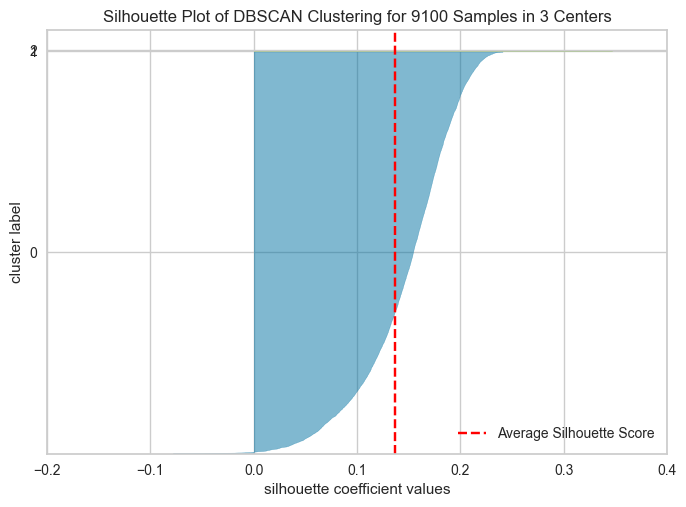

In [271]:
dbscan = DBSCAN(eps=0.5, min_samples=6, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

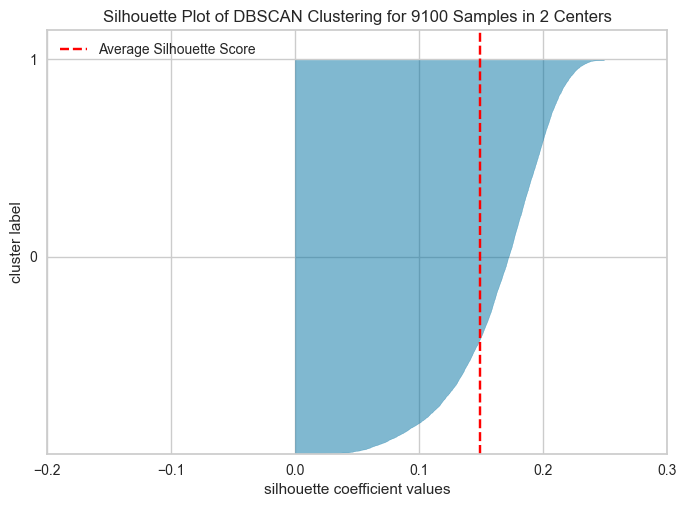

In [126]:
dbscan = DBSCAN(eps=0.5, min_samples=30, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

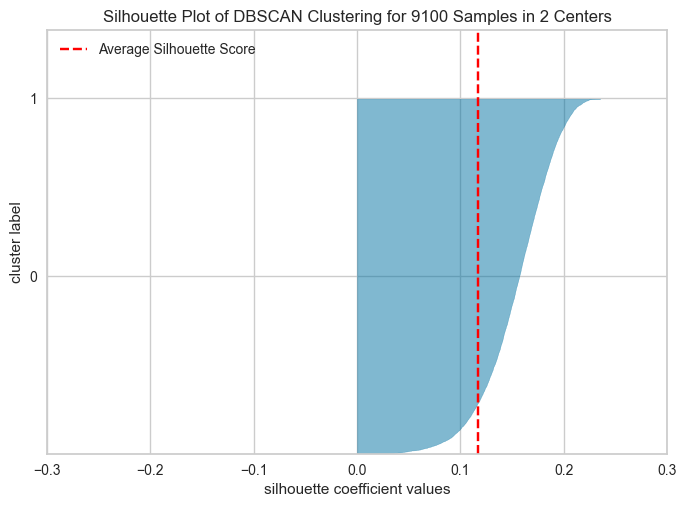

In [299]:
dbscan = DBSCAN(eps=0.433, min_samples=30, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

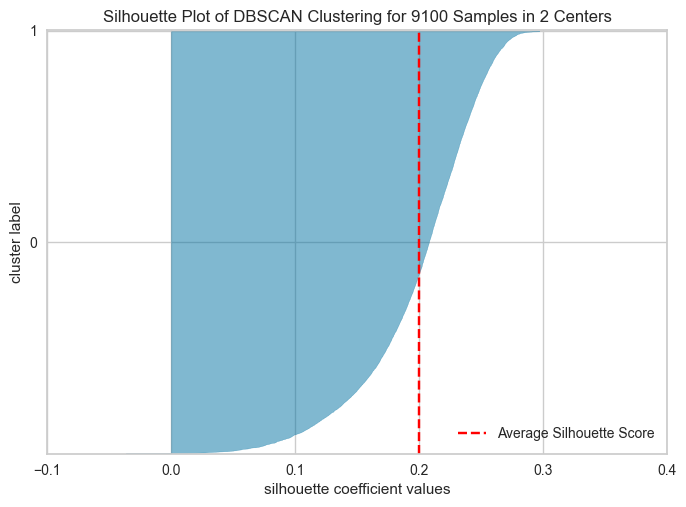

In [124]:
dbscan = DBSCAN(eps=0.7, min_samples=50, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

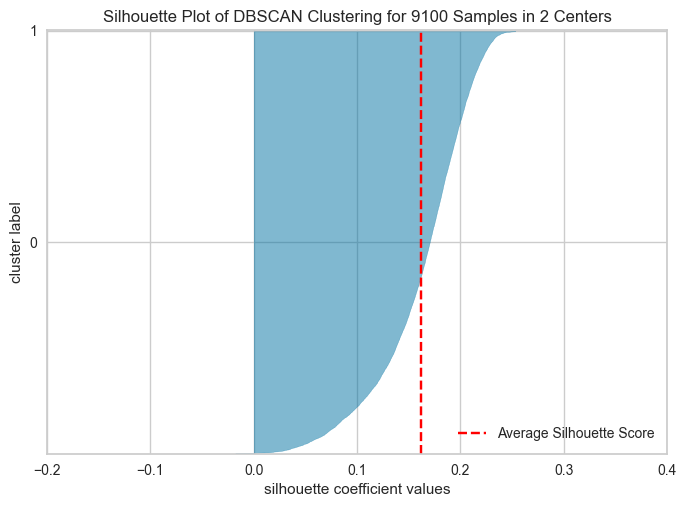

In [123]:
dbscan = DBSCAN(eps=0.7, min_samples=100, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

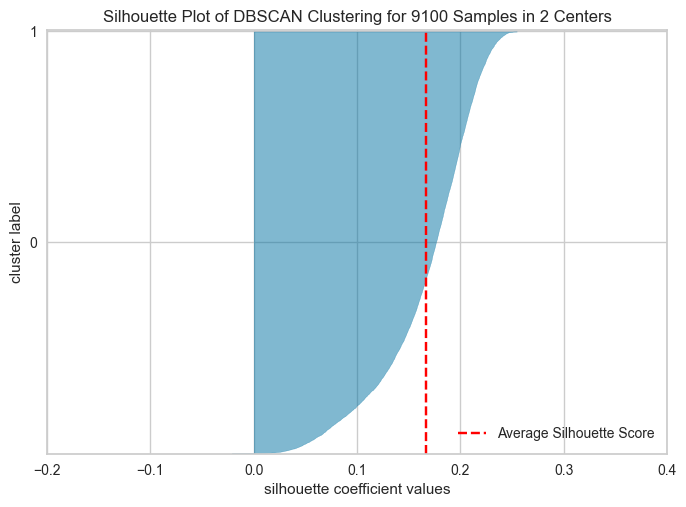

In [263]:
dbscan = DBSCAN(eps=0.7, min_samples=1000, metric="cosine")
dbscan.fit(emb_sents)

n_clusters = len(set(dbscan.labels_))
dbscan.n_clusters = n_clusters
dbscan.predict = lambda x: dbscan.labels_

visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
visualizer.fit(emb_sents)  # Fit the data to the visualizer
visualizer.show();

In [278]:
dbscan = DBSCAN(eps=0.5, min_samples=6, metric="cosine")
dbscan_emb_labels = dbscan.fit_predict(emb_sents)

recipes_df["dbscan_emb_labels"] = dbscan_emb_labels
recipes_df_no_noise = recipes_df[recipes_df["dbscan_emb_labels"] != -1]

print_clusters(recipes_df = recipes_df_no_noise, cluster_labels = recipes_df_no_noise["dbscan_emb_labels"], n_recipes = 6, random_state=42)

Cluster 0
----------
herbed peasant bread
sarasota s hickory orange roasted pork loin
spinach parmesan meatloaf
sunny california sour cream pineapple cake with pineapple glaze
thai sticky pudding  kanom nam tan
classic moroccan mint tea



Cluster 1
----------
bourbon sidecar
calvados sidecars
pear sidecar
classic sidecar
tokyo side car
crown sidecar





### Results Analysis
Cluster 1 only contains 6 recipes, as setting n_recipes to be anything above 6 returned an error. So besides grouping recipes with sidecar in the name, DBScan grouped every other recipe in cluster 0, which isn't that useful.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

In [167]:
from scipy.cluster.hierarchy import (
    average,
    complete,
    dendrogram,
    fcluster,
    single,
    ward,
)

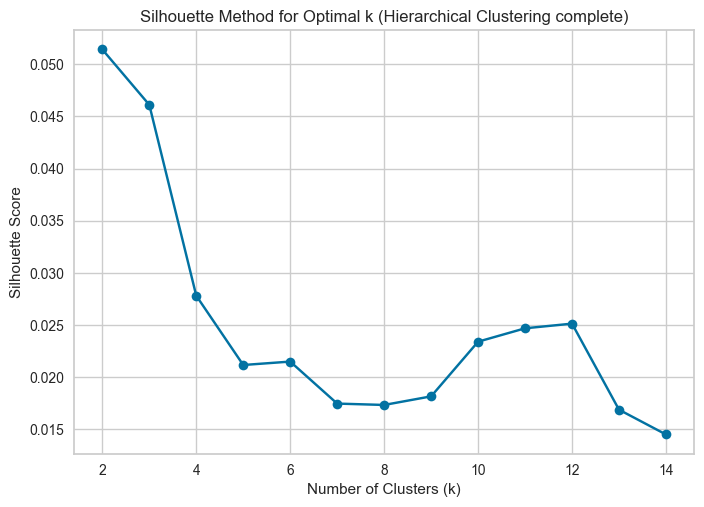

In [320]:
silhouette_scores = []
linkage_array = linkage(emb_sents, method="complete", metric="cosine")
k_values = range(2, 15)

for k in k_values:
    labels = fcluster(linkage_array, k, criterion="maxclust")
    
    if len(set(labels)) > 1:
        score = silhouette_score(emb_sents, labels, metric="cosine")
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k (Hierarchical Clustering complete)")
plt.show()

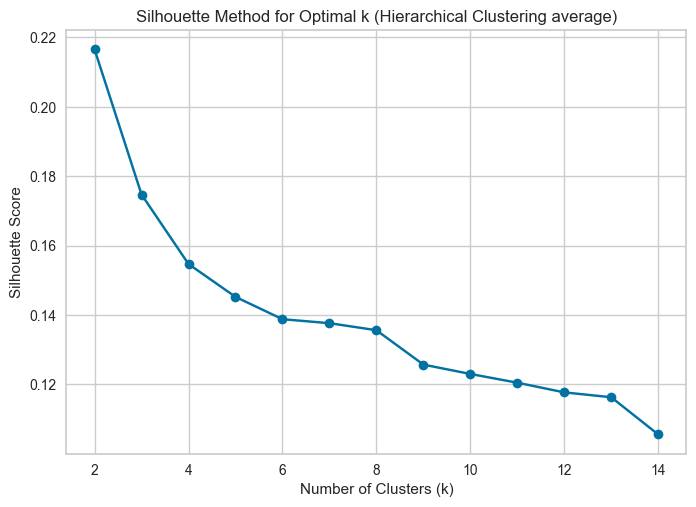

In [321]:
silhouette_scores = []
linkage_array = linkage(emb_sents, method="average", metric="cosine")
k_values = range(2, 15)

for k in k_values:
    labels = fcluster(linkage_array, k, criterion="maxclust")
    
    if len(set(labels)) > 1:
        score = silhouette_score(emb_sents, labels, metric="cosine")
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k (Hierarchical Clustering average)")
plt.show()

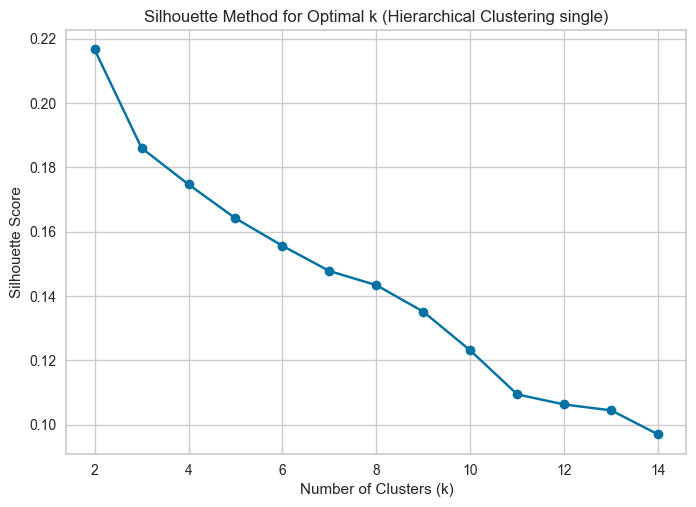

In [322]:
silhouette_scores = []
linkage_array = linkage(emb_sents, method="single", metric="cosine")
k_values = range(2, 15)

for k in k_values:
    labels = fcluster(linkage_array, k, criterion="maxclust")
    
    if len(set(labels)) > 1:
        score = silhouette_score(emb_sents, labels, metric="cosine")
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k (Hierarchical Clustering single)")
plt.show()

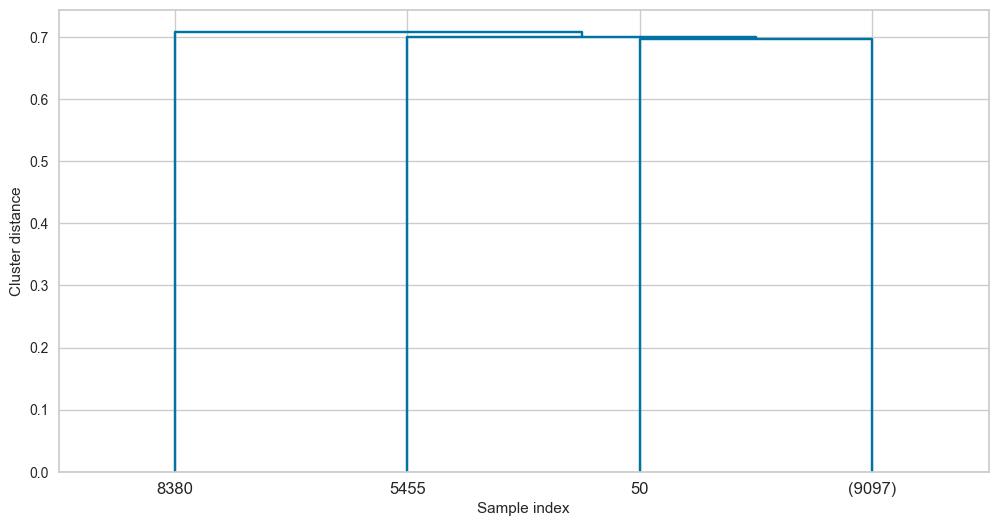

In [325]:
linkage_array = linkage(emb_sents, method="single", metric="cosine")

plt.figure(figsize=(12, 6))  # Adjust width and height
dendrogram(linkage_array, p=4, truncate_mode="lastp")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");
plt.show()

In [250]:
hier_labels1 = fcluster(linkage_array, 10, criterion="maxclust") 
hier_labels1

array([6, 6, 6, ..., 5, 3, 5], dtype=int32)

In [251]:
recipes_df["hier_labels1"] = hier_labels1

print_clusters(recipes_df = recipes_df, cluster_labels = recipes_df["hier_labels1"], n_recipes = 10, random_state=42)

Cluster 1
----------
brittany s favorite cookies
mom s southern cream cookies
lemon cookies  with protein powder
easy old fashion sugar cookies
raspberry dream cookies
flourless monster cookies
cannoli cookies
oatmeal toffee cookies
brown sugar crackle cookies
banshee



Cluster 2
----------
pomegranate vinaigrette
neopilitian
sage   mint tea  for sore throats and more
julia child s salt marinade  rub  with herbs and spices for pork
vanilla vinaigrette
hpnotiq margarita
yummy sweet tea
creamy vinaigrette dressing
frozen lemon berry margaritas
caramel iced coffee at home



Cluster 3
----------
butterfingers
57 t bird with hawaiian plates
schwenkbraten
lite white russian
fen s fang
pollo asado
pear  leek and gruyre turnovers
beef wellington ramsay style
kart wheels
mutabbak



Cluster 4
----------
rich  n creamy potato casserole
twice baked potato
mini turkey meatloaves wrapped in collard greens
healthy tortilla chicken pizza
smoked salmon cream cheese spread
roasted balsamic vegetables

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)